In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/home/ubuntu/cidds/CIDDS-001/traffic/OpenStack/CIDDS-001-internal-week1.csv")

/home/ubuntu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,attackID,attackDescription
0,2017-03-15 00:01:16.632,0.000,TCP,192.168.100.5,445,192.168.220.16,58844.0,1,108,1,.AP...,0,normal,---,---,---
1,2017-03-15 00:01:16.552,0.000,TCP,192.168.100.5,445,192.168.220.15,48888.0,1,108,1,.AP...,0,normal,---,---,---
2,2017-03-15 00:01:16.551,0.004,TCP,192.168.220.15,48888,192.168.100.5,445.0,2,174,1,.AP...,0,normal,---,---,---
3,2017-03-15 00:01:16.631,0.004,TCP,192.168.220.16,58844,192.168.100.5,445.0,2,174,1,.AP...,0,normal,---,---,---
4,2017-03-15 00:01:16.552,0.000,TCP,192.168.100.5,445,192.168.220.15,48888.0,1,108,1,.AP...,0,normal,---,---,---


In [5]:
df['class'].value_counts()

normal      7010897
attacker     746230
victim       694393
Name: class, dtype: int64

In [6]:
df['anomalous'] = np.where(df['class'] == 'normal', 0, 1)

In [7]:
df.head()

,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,attackID,attackDescription,anomalous
0,2017-03-15 00:01:16.632,0.000,TCP,192.168.100.5,445,192.168.220.16,58844.0,1,108,1,.AP...,0,normal,---,---,---,0
1,2017-03-15 00:01:16.552,0.000,TCP,192.168.100.5,445,192.168.220.15,48888.0,1,108,1,.AP...,0,normal,---,---,---,0
2,2017-03-15 00:01:16.551,0.004,TCP,192.168.220.15,48888,192.168.100.5,445.0,2,174,1,.AP...,0,normal,---,---,---,0
3,2017-03-15 00:01:16.631,0.004,TCP,192.168.220.16,58844,192.168.100.5,445.0,2,174,1,.AP...,0,normal,---,---,---,0
4,2017-03-15 00:01:16.552,0.000,TCP,192.168.100.5,445,192.168.220.15,48888.0,1,108,1,.AP...,0,normal,---,---,---,0


In [8]:
df['anomalous'].value_counts()

0    7010897
1    1440623
Name: anomalous, dtype: int64

In [9]:
df.dtypes

Date first seen       object
Duration             float64
Proto                 object
Src IP Addr           object
Src Pt                 int64
Dst IP Addr           object
Dst Pt               float64
Packets                int64
Bytes                 object
Flows                  int64
Flags                 object
Tos                    int64
class                 object
attackType            object
attackID              object
attackDescription     object
anomalous              int64
dtype: object

In [10]:
X = df.iloc[0:100000,[1,4,6,7,9,11,16]]
#y = df['anomalous']
#X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [11]:
X

,Duration,Src Pt,Dst Pt,Packets,Flows,Tos,anomalous
0,0.000,445,58844.0,1,1,0,0
1,0.000,445,48888.0,1,1,0,0
2,0.004,48888,445.0,2,1,0,0
3,0.004,58844,445.0,2,1,0,0
4,0.000,445,48888.0,1,1,0,0
...,...,...,...,...,...,...,...
99995,0.000,34316,80.0,1,1,0,0
99996,0.000,34843,80.0,1,1,0,0
99997,0.000,34844,80.0,1,1,0,0
99998,0.000,60331,80.0,1,1,0,0


In [12]:
X['anomalous'].value_counts()

0    94289
1     5711
Name: anomalous, dtype: int64

In [13]:
train, test = train_test_split(X, test_size=.2) 
train_normal = train[train['anomalous']==0] 
train_outliers = train[train['anomalous']==1] 
outlier_prop = len(train_outliers) / len(train_normal) 
svm = OneClassSVM(kernel='rbf', nu=outlier_prop, gamma=0.000001) 


In [14]:
svm.fit(train_normal)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=1e-06, kernel='rbf',
            max_iter=-1, nu=0.060150276301665764, random_state=None,
            shrinking=True, tol=0.001, verbose=False)

In [15]:
test

,Duration,Src Pt,Dst Pt,Packets,Flows,Tos,anomalous
10042,0.085,443,48605.0,4,1,0,0
20106,0.127,57180,443.0,9,1,0,0
73910,0.000,445,43145.0,1,1,0,0
9247,0.000,52463,80.0,1,1,0,0
21852,0.000,51358,4444.0,1,1,0,1
...,...,...,...,...,...,...,...
38660,0.000,443,34457.0,1,1,0,0
6211,0.000,8082,50807.0,1,1,32,0
70816,0.000,80,47433.0,1,1,32,0
98761,0.000,53,32802.0,1,1,0,0


In [16]:
y_pred = svm.predict(test) 

In [17]:
y_pred

array([ 1,  1,  1, ...,  1, -1,  1])

Text(0, 0.5, 'x4')

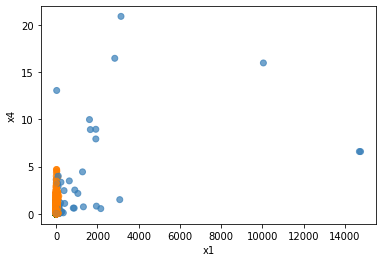

In [18]:
x = test['Packets'] 
y = test['Duration'] 
colors = np.array(['#377eb8', '#ff7f00']) 
plt.scatter(x, y, alpha=0.7, c=colors[(y_pred + 1) // 2]) 
plt.xlabel('x1') 
plt.ylabel('x4')

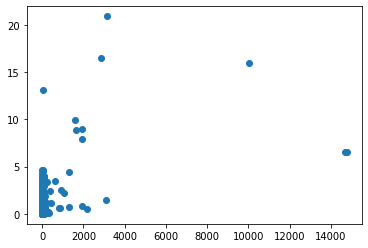

In [19]:
x = test['Packets'] 
y = test['Duration'] 
plt.scatter(x, y) 

In [23]:
y_pred_t = np.where(y_pred == -1, 1, 0)
confusion_matrix(test['anomalous'], y_pred_t)

array([[16797,  2031],
       [  137,  1035]])